In [22]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 준비 

In [3]:
# 패션 mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# 이미지 입력시에는 채널에 대한 정보가 있어야함
x_train.shape

(60000, 28, 28)

In [5]:
# 지금은 Conv2D를 적용하기 위해서 채널 차원을 추가
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255 

- 255로 나누는거는 스케일링임 

In [6]:
scaled_train.shape

(60000, 28, 28, 1)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 합성곱 신경망 모델 구성

1. 합성곱 층으로 이미지에서 특징을 감지
2. 밀집층으로 클래스에 따른 분류 확률을 계산

In [10]:
model = keras.Sequential()

In [11]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same",
                             input_shape = (28, 28, 1)))

- 패션 MNIST 이미지가 (28, 28) 크기에 세임 패딩을 적용, 32개의 필터 사용
    - 출력되는 특성맵의 크기는 (28, 28, 32)

In [12]:
# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

- (2, 2) 크기의 커널을 이용하여 풀링을 적용해서 특성맵의 크기가 절반으로 줄어들고 특성맵의 깊이는 그래도
    - 출력되는 특성맵의 크기는 (14, 14, 32)

In [13]:
# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))          

- (14, 14) 크기에 세임 패딩, 64개 필터 사용
    - 출력되는 특성맵의 크기 (14, 14, 64)
- (2, 2)크기의 커널을 이용하여 풀링
    - 출력되는 특성맵의 크기는 (7, 7, 64)  # 피처맵의 개수(64)는 그대로

In [14]:
# 3차원 특성맵을 일렬로 펼침
# 10개의 유닛을 가진 밀집층에서 확률을 계산하기 때문에 
model.add(keras.layers.Flatten())

In [16]:
# 밀집 은닉층을 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

In [17]:
# 출력층
# 10개의 클래스를 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation = "softmax"))

In [18]:
# 모델 구조 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

- 파라미터 개수
    - 첫 번째 합성곱 층
        - 필터의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
        - 3 * 3 * 1 * 32 + 32(y절편) = 320
        
    - 두 번째 합성곱 층
        - 필터의 크기 : (3, 3, 32)  # 앞에서 32개의 채널차원이 넘어오고 있어서 32
        - 필터의 개수 : 64
        - 3 * 3 * 32 * 64 + 64 = 18496
        
    - 밀집 은닉층
        - Flatten 층에서 (3136,) 크기의 배열이 전달(7 * 7 * 64)
        - 3136 * 유닛 수(100) + 유닛 수(100) = 313700
        
    - 출력층
        - 밀집 은닉층에서 (100,) 크기의 배열이 전달
        - 100 * 10 + 10 = 1010

- 뒤에 1은 채널차원
    - input_shape를 보고 채널차원 알 수 있음
- 필터의 개수는
    - conv2d (Conv2D)    (None, 28, 28, 32) 보고 알 수 있음
- 두 번째 합성곱 층
    - 두 번째 합성곱 - 풀링층 추가 
    - 의 kernel_size 보고 알 수 있음

# 모델 훈련 

- 옵티마이저 : Adam
- 콜백 함수 : ModelCheckpoint, EarlyStopping

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.h5",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
             metrics="accuracy")

In [23]:
# 검증 데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                             stratify = y_train, random_state = 12)

In [24]:
history = model.fit(x_sub, y_sub, epochs = 20, validation_data=(x_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20


1500/1500 [==============================] - 17s 11ms/step - loss: 0.5319 - accuracy: 0.8068 - val_loss: 0.3495 - val_accuracy: 0.8712
Epoch 2/20
  10/1500 [..............................] - ETA: 18s - loss: 0.3784 - accuracy: 0.8844

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 16s 10ms/step - loss: 0.3499 - accuracy: 0.8744 - val_loss: 0.3094 - val_accuracy: 0.8863
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3009 - accuracy: 0.8914 - val_loss: 0.2802 - val_accuracy: 0.8995
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2698 - accuracy: 0.9015 - val_loss: 0.2585 - val_accuracy: 0.9053
Epoch 5/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2443 - accuracy: 0.9109 - val_loss: 0.2505 - val_accuracy: 0.9108
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2250 - accuracy: 0.9163 - val_loss: 0.2633 - val_accuracy: 0.9040
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2070 - accuracy: 0.9243 - val_loss: 0.2426 - val_accuracy: 0.9125
Epoch 8/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1886 - accuracy: 0.9306 - val_loss: 0.2421 - val_accurac

# 훈련 로그 확인

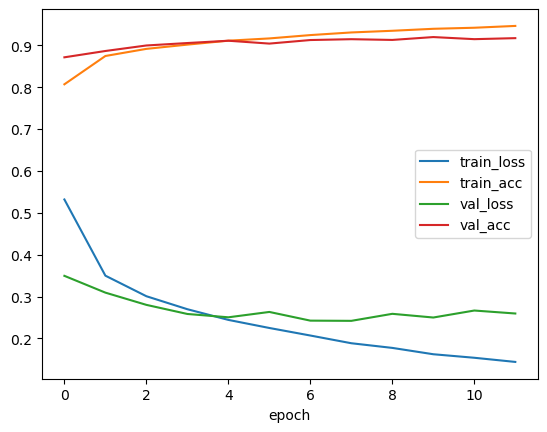

In [25]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 검증

In [27]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [28]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2475 - accuracy: 0.9136


[0.24754013121128082, 0.9136000275611877]

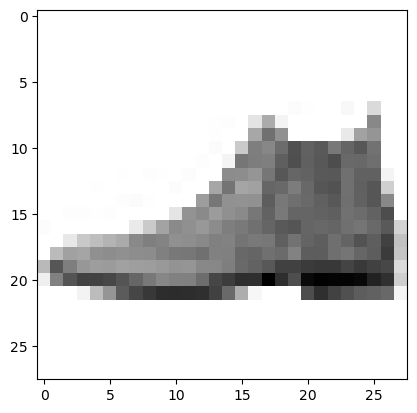

In [30]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [32]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 [==============================] - 0s 73ms/step
[[7.2910511e-11 3.4345350e-12 1.4776690e-11 1.8400555e-11 1.1070164e-11
  6.2961290e-06 4.9446744e-12 1.9496038e-04 2.1137352e-10 9.9979872e-01]]


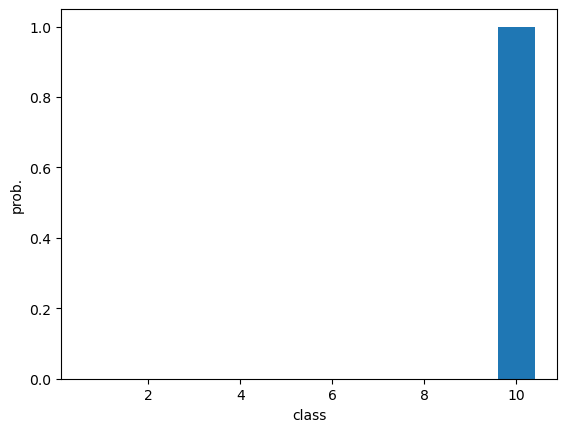

In [33]:
plt.figure()

plt.bar(range(1, 11), preds[0])

plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [34]:
# 레이블 리스트
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클 부츠"]

In [37]:
classes[np.argmax(preds)]

'앵클 부츠'

In [39]:
classes[y_test[0]]

'앵클 부츠'